In [166]:
import sys
print(sys.executable)

/home/julian/miniconda3/envs/projektarbeit_1/bin/python


In [167]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)


2.7.1+cpu


In [168]:
x = torch.tensor([2.0, 3.], requires_grad=True).to(torch.float32)
y = x.sum() * 2
print(f"y: {y}")
y.backward()
print("y: ", y)
print("y grad:", y.retain_grad())
print("x grad:", x.grad)

y: 10.0
y:  tensor(10., grad_fn=<MulBackward0>)
y grad: None
x grad: tensor([2., 2.])


In [169]:
weight = 0.5
bias = 1.5

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step) #unsqueeze(dim=1 )
y = weight * X + bias
print(X[:10], y[:10])

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800]) tensor([1.5000, 1.5100, 1.5200, 1.5300, 1.5400, 1.5500, 1.5600, 1.5700, 1.5800,
        1.5900])


In [170]:
X.__len__(), y.__len__()

(50, 50)

In [171]:
train_split = 0.8
test_split = 0.2

X_train_split_int, X_test_split_int = int(train_split * len(X)), int(test_split * len(X))
y_train_split_int, y_test_split_int = int(train_split * len(y)), int(test_split * len(y))

In [172]:
X_train = X[:X_train_split_int]
X_test = X[:X_test_split_int]
y_train = y[:y_train_split_int]
y_test = y[:y_test_split_int]

Visualize

In [173]:
def plot(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="training")
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

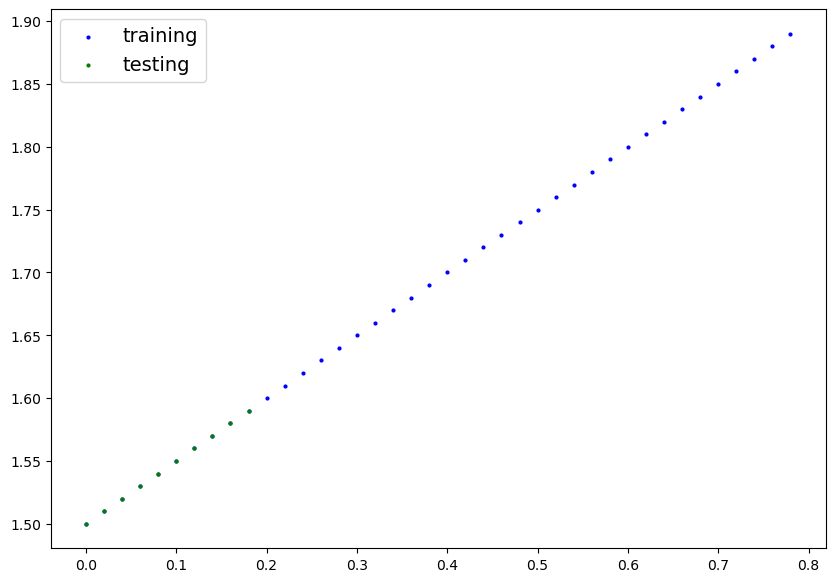

In [174]:
plot()

In [175]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    pass

In [176]:
torch.rand(1).dim()

1

In [177]:
l = LinearRegressionModel()
list(l.parameters())

[Parameter containing:
 tensor([0.5832], requires_grad=True),
 Parameter containing:
 tensor([0.3376], requires_grad=True)]

In [178]:
l.state_dict()

OrderedDict([('weights', tensor([0.5832])), ('bias', tensor([0.3376]))])

In [179]:
with torch.inference_mode():
    y_preds = l(X_test)
    
y_preds
#plot(predictions=y_preds)
print(y_preds.data)
print(l.weights)
print(l.bias)

tensor([0.3376, 0.3493, 0.3610, 0.3726, 0.3843, 0.3960, 0.4076, 0.4193, 0.4310,
        0.4426])
Parameter containing:
tensor([0.5832], requires_grad=True)
Parameter containing:
tensor([0.3376], requires_grad=True)


In [180]:
l.state_dict()

OrderedDict([('weights', tensor([0.5832])), ('bias', tensor([0.3376]))])

tensor([0.3376, 0.3493, 0.3610, 0.3726, 0.3843, 0.3960, 0.4076, 0.4193, 0.4310,
        0.4426]) tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])


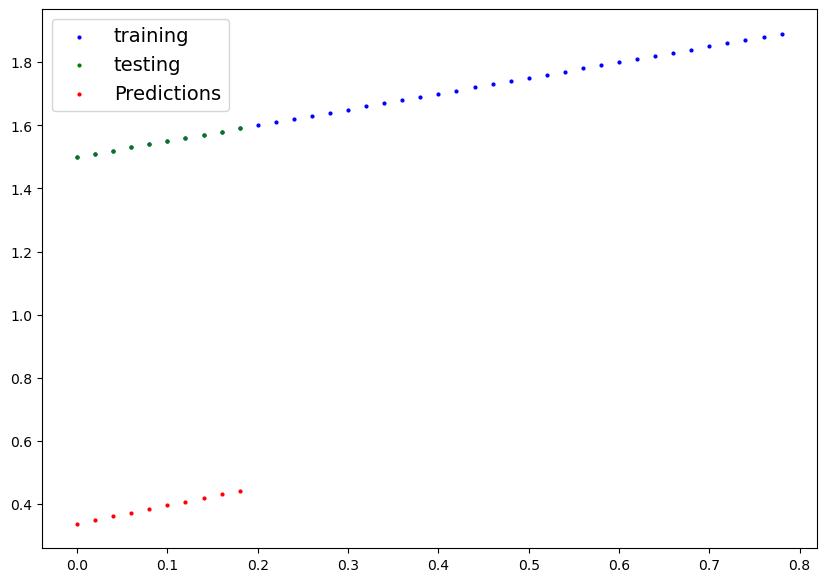

In [181]:
with torch.inference_mode():
    y_preds = l(X_test)
plot(predictions=y_preds)
print(y_preds.data, X_test.data)

In [182]:
loss_fn = nn.L1Loss(reduction="mean")
optimizer = torch.optim.SGD(params=l.parameters(), lr=0.01)

In [183]:
next(l.parameters()).data == l.state_dict()["weights"].data

tensor([True])

Test loss: 1.144512414932251, Epoch: 1/100
Test loss: 1.0410025119781494, Epoch: 11/100
Test loss: 0.9374926686286926, Epoch: 21/100
Test loss: 0.8339827656745911, Epoch: 31/100
Test loss: 0.7304728031158447, Epoch: 41/100
Test loss: 0.6269629001617432, Epoch: 51/100
Test loss: 0.5234530568122864, Epoch: 61/100
Test loss: 0.41994303464889526, Epoch: 71/100
Test loss: 0.3164331912994385, Epoch: 81/100
Test loss: 0.22838087379932404, Epoch: 91/100


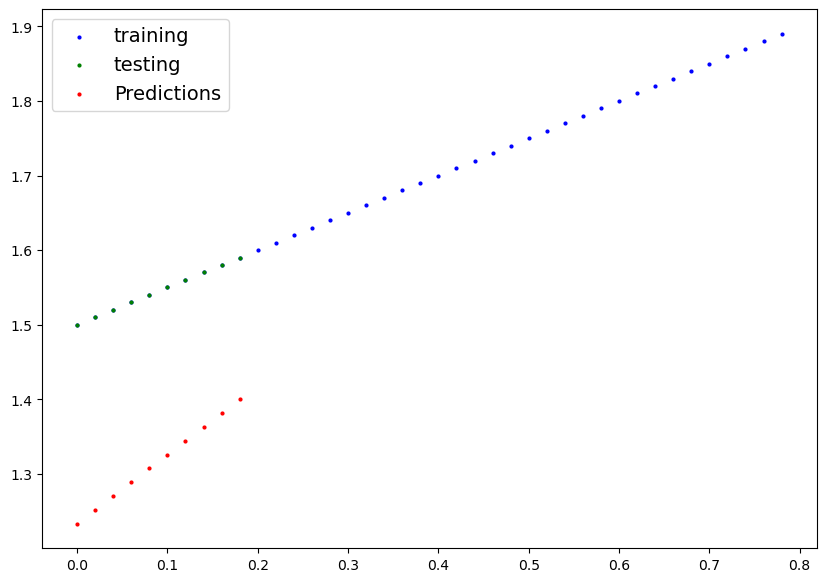

In [184]:
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 100
for epoch in range(epochs):
    l.train()
    
    #forward pass
    y_preds = l(X_train)
    
    #calculate loss
    loss = loss_fn(y_preds, y_train)
    #print(f"Loss: {loss}")
    #optimizer zero grad
    optimizer.zero_grad()
    
    
    #backward pass
    loss.backward()
    #print(f"Weight gradient: {l.weights.grad}, Bias gradient: {l.bias.grad}")
    #step the optimizer
    
    optimizer.step()
    
    l.eval() # turn off unrequired settings (dropout, batchnorm, etc.)
    
    with torch.inference_mode():
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss.item())
            y_test_preds = l(X_test)
            test_loss = loss_fn(y_test_preds, y_test)
            test_loss_values.append(test_loss.item())
            print(f"Test loss: {test_loss}, Epoch: {epoch+1}/{epochs}")
    
plot(predictions=y_test_preds)

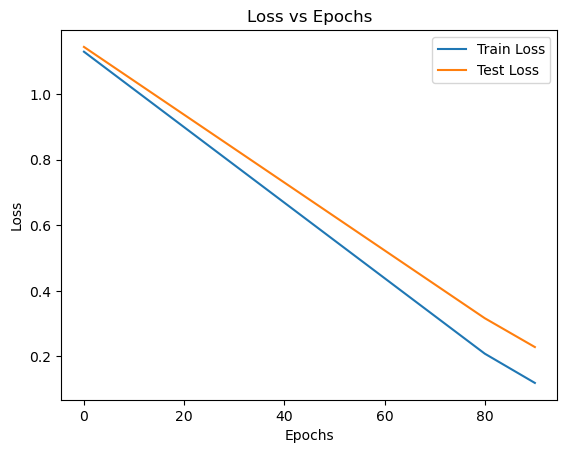

In [185]:
plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [186]:
weight, bias

(0.5, 1.5)

In [187]:
l.state_dict()["weights"], l.state_dict()["bias"]

(tensor([0.9296]), tensor([1.2746]))

In [188]:
#torch.save(), torch.load(), torch.nn.Module.load_state_dict()


In [189]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=l.state_dict(), f=MODEL_SAVE_PATH)

In [190]:
!ls -l models

total 8
-rw-rw-r-- 1 julian julian 2101 Jul 23 08:18 01_pytorch_workflow_model.pth
-rw-rw-r-- 1 julian julian 2205 Jul 23 07:51 01_pytorch_workflow_model_self.pth


In [191]:
load_model_l = LinearRegressionModel()
load_model_l.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [192]:
load_model_l.state_dict()

OrderedDict([('weights', tensor([0.9296])), ('bias', tensor([1.2746]))])

In [193]:
load_model_l.state_dict()["weights"] == l.state_dict()["weights"]

tensor([True])

In [194]:
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.7.1+cpu
Using device: cpu


In [195]:
weight = 0.7
bias = 0.3
start = 0
end = 10
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(X[:10], y[:10])


tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000],
        [0.5000],
        [0.6000],
        [0.7000],
        [0.8000],
        [0.9000]]) tensor([[0.3000],
        [0.3700],
        [0.4400],
        [0.5100],
        [0.5800],
        [0.6500],
        [0.7200],
        [0.7900],
        [0.8600],
        [0.9300]])


In [196]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

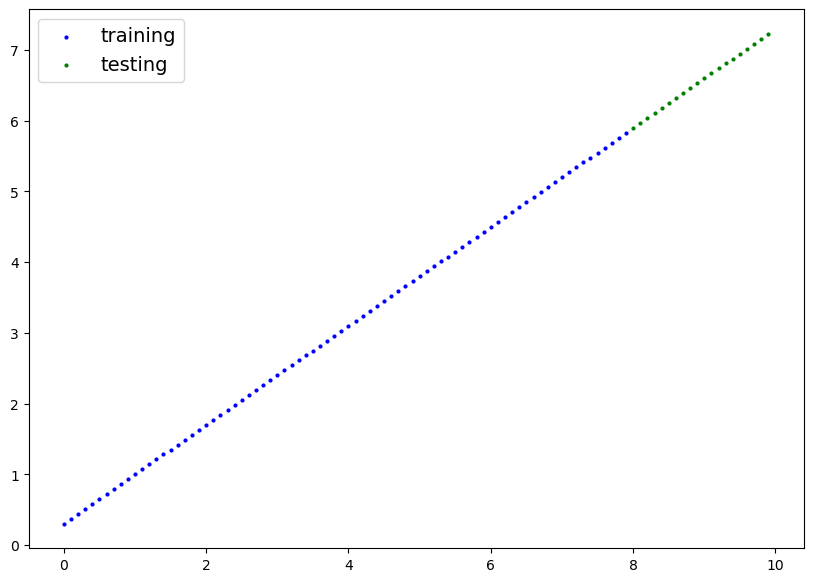

In [197]:
plot(X_train, y_train, X_test, y_test)

In [198]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_Layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor):
        return self.linear_Layer(x)

In [199]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_Layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_Layer.weight', tensor([[0.7645]])),
              ('linear_Layer.bias', tensor([0.8300]))]))

In [200]:
next(model_1.parameters()).device

device(type='cpu')

In [201]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [202]:
epoch_count = []
loss_values = []
epochs = 100

for epoch in range(epochs):
    model_1.train()
    
    y_preds = model_1(X_train)
    
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_1.eval()
    
    with torch.inference_mode():
        if epoch % 10 == 0:
            test_pred = model_1(X_test)
            
            test_loss = loss_fn(test_pred, y_test)
            
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.7849351167678833 | Test loss: 0.7441024780273438
Epoch: 10 | Train loss: 0.1950444132089615 | Test loss: 0.2748256325721741
Epoch: 20 | Train loss: 0.17812438309192657 | Test loss: 0.2508866488933563
Epoch: 30 | Train loss: 0.16120442748069763 | Test loss: 0.22694751620292664
Epoch: 40 | Train loss: 0.14428433775901794 | Test loss: 0.2030087411403656
Epoch: 50 | Train loss: 0.12736687064170837 | Test loss: 0.17929348349571228
Epoch: 60 | Train loss: 0.1104518324136734 | Test loss: 0.15580150485038757
Epoch: 70 | Train loss: 0.09367011487483978 | Test loss: 0.14665448665618896
Epoch: 80 | Train loss: 0.08115354925394058 | Test loss: 0.2103060781955719
Epoch: 90 | Train loss: 0.06880410760641098 | Test loss: 0.2510453760623932


In [203]:
from pprint import pprint
pprint(model_1.state_dict())
print(f"weight:{weight}, bias:{bias}")

OrderedDict([('linear_Layer.weight', tensor([[0.6809]])),
             ('linear_Layer.bias', tensor([0.4198]))])
weight:0.7, bias:0.3


In [204]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_self.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_self.pth


In [205]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(loaded_model_1)

LinearRegressionModel(
  (linear_Layer): Linear(in_features=1, out_features=1, bias=True)
)


In [206]:
loaded_model_1.eval()

with torch.inference_mode():
    test_pred = model_1(X_test)
    y_preds_loaded = loaded_model_1(X_test)
test_pred == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# hitting extra lecture

In [207]:
import torch
from torch import nn

In [208]:
weight = 0.5
bias = 0.2
start = 1
end = 10
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X: {X[:10]}, y: {y[:10]}")

X: tensor([[1.0000],
        [1.1000],
        [1.2000],
        [1.3000],
        [1.4000],
        [1.5000],
        [1.6000],
        [1.7000],
        [1.8000],
        [1.9000]]), y: tensor([[0.7000],
        [0.7500],
        [0.8000],
        [0.8500],
        [0.9000],
        [0.9500],
        [1.0000],
        [1.0500],
        [1.1000],
        [1.1500]])


In [209]:
X_train_split_int, X_test_split_int = int(0.8 * len(X)), int(0.2 * len(X))
y_train_split_int, y_test_split_int = int(0.8 * len(y)), int(0.2 * len(y))

X_train = X[:X_train_split_int]
X_test = X[X_train_split_int:]
y_train = y[:y_train_split_int]
y_test = y[y_train_split_int:]

In [210]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [211]:
model_self = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_self.parameters(), lr=0.01)

In [212]:
epochs = 1000

for epoch in range(epochs):
    model_self.train()
    
    y_preds = model_self(X_train)
    
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_self.eval()
    
    with torch.inference_mode():
        if epoch % 10 == 0:
            test_pred = model_self(X_test)
            test_loss = loss_fn(test_pred, y_test)
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
    

Epoch: 0 | Train loss: 3.2701306343078613 | Test loss: 6.084321975708008
Epoch: 10 | Train loss: 1.0998806953430176 | Test loss: 1.8665714263916016
Epoch: 20 | Train loss: 0.08138304203748703 | Test loss: 0.40260812640190125
Epoch: 30 | Train loss: 0.09323004633188248 | Test loss: 0.3620111644268036
Epoch: 40 | Train loss: 0.05320505425333977 | Test loss: 0.4267861843109131
Epoch: 50 | Train loss: 0.046543724834918976 | Test loss: 0.42794790863990784
Epoch: 60 | Train loss: 0.053656164556741714 | Test loss: 0.4044607877731323
Epoch: 70 | Train loss: 0.06599916517734528 | Test loss: 0.3724926710128784
Epoch: 80 | Train loss: 0.03152572363615036 | Test loss: 0.3356831669807434
Epoch: 90 | Train loss: 0.04538222402334213 | Test loss: 0.40361008048057556
Epoch: 100 | Train loss: 0.03805411607027054 | Test loss: 0.41543838381767273
Epoch: 110 | Train loss: 0.0341886468231678 | Test loss: 0.4209291636943817
Epoch: 120 | Train loss: 0.054184358566999435 | Test loss: 0.380058616399765
Epoch: 1

# other stuff

**loss**, *loss*

In [213]:
def wrapper(func):
    def logger(*args):
        print(f"logged {func.__name__}")
        return func()
    return logger

def function_1():
    print("function_1 was called")

In [214]:
wrapper(function_1)

<function __main__.wrapper.<locals>.logger(*args)>

In [215]:
function_1 = wrapper(function_1)

In [216]:
function_1()

logged function_1
function_1 was called


In [217]:
text = (b"hello")

In [218]:
type(text)

bytes

In [219]:
import threading
import time

In [220]:
import torch
import torch.nn as nn

In [221]:
class BasicNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.net = nn.Linear(5, 3, 1)
        
    def forward(self, x):
        x = nn.functional.relu(self.net(x))
        print(self.net(x))
        return self.net(x)

In [222]:
BasicNet().state_dict()

OrderedDict([('net.weight',
              tensor([[-0.2177,  0.2626,  0.3942, -0.3281,  0.3887],
                      [ 0.0837,  0.3304,  0.0606,  0.2156, -0.0631],
                      [ 0.3448,  0.0661, -0.2088,  0.1140, -0.2060]])),
             ('net.bias', tensor([-0.0524, -0.1816,  0.2967]))])

In [223]:
import dis

def add(a, b):
    return a + b

dis.dis(add)


  3           0 RESUME                   0

  4           2 LOAD_FAST                0 (a)
              4 LOAD_FAST                1 (b)
              6 BINARY_OP                0 (+)
             10 RETURN_VALUE


In [224]:
from typing import TypeVar, Generic

T = TypeVar("T")

class Stack(Generic[T]):
    def __init__(self):
        self.items: list[T] = []

In [225]:
type(T)

typing.TypeVar

In [226]:
t = torch.tensor((2,2))
t

tensor([2, 2])

In [227]:
t_rand = torch.rand((2,2, 2), requires_grad=True)
t_rand, t_rand.dim()

(tensor([[[0.1053, 0.2695],
          [0.3588, 0.1994]],
 
         [[0.5472, 0.0062],
          [0.9516, 0.0753]]], requires_grad=True),
 3)

In [228]:
t + t_rand

tensor([[[2.1053, 2.2695],
         [2.3588, 2.1994]],

        [[2.5472, 2.0062],
         [2.9516, 2.0753]]], grad_fn=<AddBackward0>)

In [229]:
t.shape, t_rand.shape

(torch.Size([2]), torch.Size([2, 2, 2]))

In [230]:
t_rand.min()

tensor(0.0062, grad_fn=<MinBackward1>)

In [231]:
print(t.grad)

None


In [232]:

type(t_rand.grad)

NoneType

In [233]:
y = t**2 - t_rand **3

In [234]:
y

tensor([[[3.9988, 3.9804],
         [3.9538, 3.9921]],

        [[3.8362, 4.0000],
         [3.1384, 3.9996]]], grad_fn=<SubBackward0>)

In [235]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
a = torch.tensor([5.], requires_grad=True)
b = torch.tensor([3.], requires_grad=True)

y = a**2 - b**2
y.backward()
print(a.grad, b.grad)

tensor([10.]) tensor([-6.])


In [ ]:
a.grad.data == a.grad

tensor([True])

In [ ]:
x = torch.rand(1, 10,  requires_grad=True)
w = torch.rand(10, 1,  requires_grad=True)
b = torch.rand(1,  requires_grad=True)

In [ ]:
w, x

(tensor([[0.5649],
         [0.2962],
         [0.0320],
         [0.9796],
         [0.6787],
         [0.7290],
         [0.2873],
         [0.4947],
         [0.0455],
         [0.4324]], requires_grad=True),
 tensor([[0.1915, 0.8038, 0.2128, 0.0855, 0.2972, 0.6187, 0.0477, 0.4475, 0.9797,
          0.9000]], requires_grad=True))

In [ ]:
y = torch.matmul(x, w) + b

In [ ]:
y.shape

torch.Size([1, 1])

In [ ]:
loss = 1 - y
loss

tensor([[-1.4287]], grad_fn=<RsubBackward1>)

In [ ]:
loss.backward()
w.grad

tensor([[-0.1915],
        [-0.8038],
        [-0.2128],
        [-0.0855],
        [-0.2972],
        [-0.6187],
        [-0.0477],
        [-0.4475],
        [-0.9797],
        [-0.9000]])

In [ ]:
with torch.no_grad():
    w = w - 0.001 * w.grad.data

In [ ]:
#
